## Explore And Cleaning The Dataset 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import geoviews as gv
import geopandas as gpd
from scipy.stats import linregress
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Convert the csv file into a Pandas DataFrame
primary_df =pd.read_csv("Resources/Worldwide-Earthquake-database.csv", index_col=0)

# Display sample data
primary_df.head()

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,EQ_MAG_MW,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
I_D,,,,,,,,,,,,,,,,,,,,,
1,No,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
8,No,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Total number of row and columns 
primary_df.shape

(6193, 46)

In [4]:
#Printing the columns' name
primary_df.columns

Index(['FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'SECOND',
       'FOCAL_DEPTH', 'EQ_PRIMARY', 'EQ_MAG_MW', 'EQ_MAG_MS', 'EQ_MAG_MB',
       'EQ_MAG_ML', 'EQ_MAG_MFA', 'EQ_MAG_UNK', 'INTENSITY', 'COUNTRY',
       'STATE', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE', 'REGION_CODE',
       'DEATHS', 'DEATHS_DESCRIPTION', 'MISSING', 'MISSING_DESCRIPTION',
       'INJURIES', 'INJURIES_DESCRIPTION', 'DAMAGE_MILLIONS_DOLLARS',
       'DAMAGE_DESCRIPTION', 'HOUSES_DESTROYED',
       'HOUSES_DESTROYED_DESCRIPTION', 'HOUSES_DAMAGED',
       'HOUSES_DAMAGED_DESCRIPTION', 'TOTAL_DEATHS',
       'TOTAL_DEATHS_DESCRIPTION', 'TOTAL_MISSING',
       'TOTAL_MISSING_DESCRIPTION', 'TOTAL_INJURIES',
       'TOTAL_INJURIES_DESCRIPTION', 'TOTAL_DAMAGE_MILLIONS_DOLLARS',
       'TOTAL_DAMAGE_DESCRIPTION', 'TOTAL_HOUSES_DESTROYED',
       'TOTAL_HOUSES_DESTROYED_DESCRIPTION', 'TOTAL_HOUSES_DAMAGED',
       'TOTAL_HOUSES_DAMAGED_DESCRIPTION'],
      dtype='object')

In [5]:
# Get more information about the columns
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 1 to 10501
Data columns (total 46 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   FLAG_TSUNAMI                        6193 non-null   object 
 1   YEAR                                6193 non-null   int64  
 2   MONTH                               5786 non-null   float64
 3   DAY                                 5632 non-null   float64
 4   HOUR                                4151 non-null   float64
 5   MINUTE                              3946 non-null   float64
 6   SECOND                              4347 non-null   object 
 7   FOCAL_DEPTH                         3228 non-null   float64
 8   EQ_PRIMARY                          4402 non-null   float64
 9   EQ_MAG_MW                           1321 non-null   float64
 10  EQ_MAG_MS                           2928 non-null   float64
 11  EQ_MAG_MB                           1802 non-nu

In [6]:
#Narrow down the columns and create a brand new, independent dataframe
worldwide_earthquake_df = primary_df[['FLAG_TSUNAMI', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'FOCAL_DEPTH', 
                                      'EQ_PRIMARY','INTENSITY', 'COUNTRY', 'LATITUDE', 'LONGITUDE',
                                      'TOTAL_DEATHS', 'TOTAL_INJURIES']].copy() 

In [7]:
# Display sample of narrowed down data
worldwide_earthquake_df.head(10)

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY,COUNTRY,LATITUDE,LONGITUDE,TOTAL_DEATHS,TOTAL_INJURIES
I_D,,,,,,,,,,,,,
1,No,-2150,NaN,NaN,NaN,NaN,7.3,NaN,JORDAN,31.1,35.5,NaN,NaN
2,Yes,-2000,NaN,NaN,NaN,NaN,NaN,10.0,SYRIA,35.683,35.8,NaN,NaN
3,No,-2000,NaN,NaN,NaN,18.0,7.1,10.0,TURKMENISTAN,38,58.2,1.0,NaN
5877,Yes,-1610,NaN,NaN,NaN,NaN,NaN,NaN,GREECE,36.4,25.4,NaN,NaN
8,No,-1566,NaN,NaN,NaN,NaN,NaN,10.0,ISRAEL,31.5,35.3,NaN,NaN
11,No,-1450,NaN,NaN,NaN,NaN,NaN,10.0,ITALY,35.5,25.5,NaN,NaN
9712,Yes,-1365,NaN,NaN,NaN,NaN,NaN,NaN,SYRIA,35.683,35.8,NaN,NaN
12,No,-1250,NaN,NaN,NaN,NaN,6.5,NaN,ISRAEL,32,35.5,NaN,NaN
13,No,-1050,NaN,NaN,NaN,NaN,6.2,NaN,JORDAN,29.6,35,NaN,NaN


In [8]:
# Display sample of narrowed down data
worldwide_earthquake_df.tail(10)

,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY,COUNTRY,LATITUDE,LONGITUDE,TOTAL_DEATHS,TOTAL_INJURIES
I_D,,,,,,,,,,,,,
10480,No,2020,2.0,23.0,16.0,10.0,6.0,NaN,IRAN,38.482,44.367,10.0,60.0
10483,No,2020,3.0,10.0,10.0,23.0,5.0,8.0,INDONESIA,-6.808,106.676,NaN,4.0
10485,No,2020,3.0,18.0,13.0,12.0,5.7,6.0,USA,40.751,-112.078,NaN,NaN
10486,No,2020,3.0,22.0,5.0,10.0,5.4,8.0,CROATIA,45.897,15.966,1.0,27.0
10487,Yes,2020,3.0,25.0,2.0,57.0,7.5,6.0,RUSSIA,48.986,157.693,NaN,NaN
10488,No,2020,4.0,1.0,12.0,10.0,5.3,NaN,CHINA,33.124,98.916,NaN,NaN
10490,Yes,2020,5.0,2.0,12.0,17.0,6.6,7.0,GREECE,34.205,25.712,NaN,NaN
10491,No,2020,5.0,7.0,20.0,10.0,4.6,NaN,IRAN,35.725,52.044,2.0,22.0
10494,No,2020,5.0,18.0,13.0,10.0,5.2,NaN,CHINA,27.296,103.281,4.0,24.0


In [9]:
#Total number of rows and columns of the new dataframe
worldwide_earthquake_df.shape

(6193, 13)

In [10]:
# Get information about the DataFrame
worldwide_earthquake_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6193 entries, 1 to 10501
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FLAG_TSUNAMI    6193 non-null   object 
 1   YEAR            6193 non-null   int64  
 2   MONTH           5786 non-null   float64
 3   DAY             5632 non-null   float64
 4   HOUR            4151 non-null   float64
 5   FOCAL_DEPTH     3228 non-null   float64
 6   EQ_PRIMARY      4402 non-null   float64
 7   INTENSITY       2815 non-null   float64
 8   COUNTRY         6193 non-null   object 
 9   LATITUDE        6144 non-null   object 
 10  LONGITUDE       6144 non-null   object 
 11  TOTAL_DEATHS    1693 non-null   float64
 12  TOTAL_INJURIES  1253 non-null   float64
dtypes: float64(8), int64(1), object(4)
memory usage: 677.4+ KB


#### Handling null values: 
##### we narrowed down the number of columns that have the most number of null values and also we are not using them for our analysis goals.
##### We leave the rest of missing values as is because it is the nature or characteristics of our dataset.
##### Comparing the total number of data (rows) 6193 with the number of Non-Null Count of each column shows that we were able to reduce the number of null values by dropping some columns resonabally.
##### As it is presented in the head and the tail of the dataset the more resent the data is the less missing value is in our dataset, which is because in many years ago there is not much data recorded. 

In [11]:
# Convert 'LATITUDE' and 'LONGITUDE' to numeric values and replace any non-numeric values with NaN
worldwide_earthquake_df['LATITUDE'] = pd.to_numeric(worldwide_earthquake_df['LATITUDE'], errors='coerce')
worldwide_earthquake_df['LONGITUDE'] = pd.to_numeric(worldwide_earthquake_df['LONGITUDE'], errors='coerce')

# Visalisation Of Dataset

## Generate a bar chart showing the top 20 countries with the highest earthquake counts

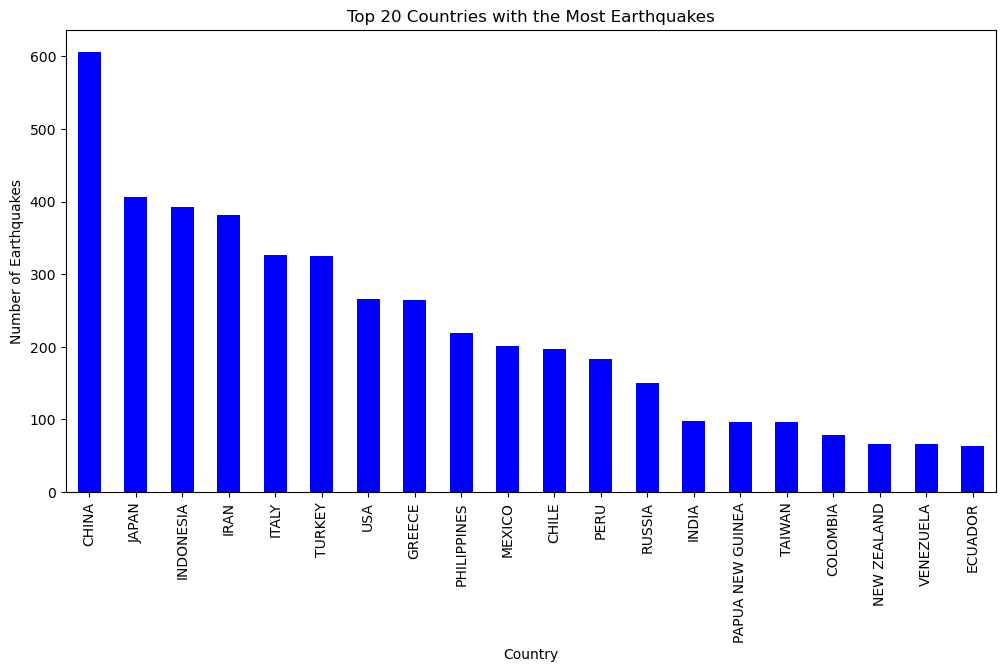

In [12]:
# Count the number of earthquakes per country
earthquake_count_per_country = worldwide_earthquake_df['COUNTRY'].value_counts()

# Select the top 20 countries
top_countries = earthquake_count_per_country.head(20)

# plot the bar chart
top_countries.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Top 20 Countries with the Most Earthquakes')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.savefig('Resources/earthquake_bar_chart.png')
plt.show()




## visualising the distribution of earthquakes for the top 20 countries with the highest earthquake counts based on latitude and longitude/ Interactive map using hvplot and geoviews

In [13]:
# Filter DataFrame for the top 20 countries
top_countries_df = worldwide_earthquake_df[worldwide_earthquake_df['COUNTRY'].isin(top_countries.index)]

# Define a GeoDataFrame with the earthquakes and their coordinates
gdf = gpd.GeoDataFrame(top_countries_df, geometry=gpd.points_from_xy(top_countries_df['LONGITUDE'], top_countries_df['LATITUDE']))

# Specify the hover information 
hover_cols = ['COUNTRY', 'FLAG_TSUNAMI', 'YEAR', 'FOCAL_DEPTH', 'EQ_PRIMARY','INTENSITY']

# Plot the map using hvplot and geoviews
map_plot = gdf.hvplot.points(
    geo=True,
    tiles='CartoLight',
    width=700,
    height=500,
    title='Interactive earthquake map for top 20 countries with highest earthquake counts',
    hover_cols=hover_cols)

# Saving the fig
plt.savefig('Resources/interacive_map_top20_count')

# Show the plot
map_plot.opts(
    tools=['hover', 'pan', 'wheel_zoom'],
)

c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (COUNTRY,FLAG_TSUNAMI,YEAR,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY)

<Figure size 640x480 with 0 Axes>

## Generate a bar chart showing the top 20 countries with the highest earthquake Intensity(intensity>=7.5)

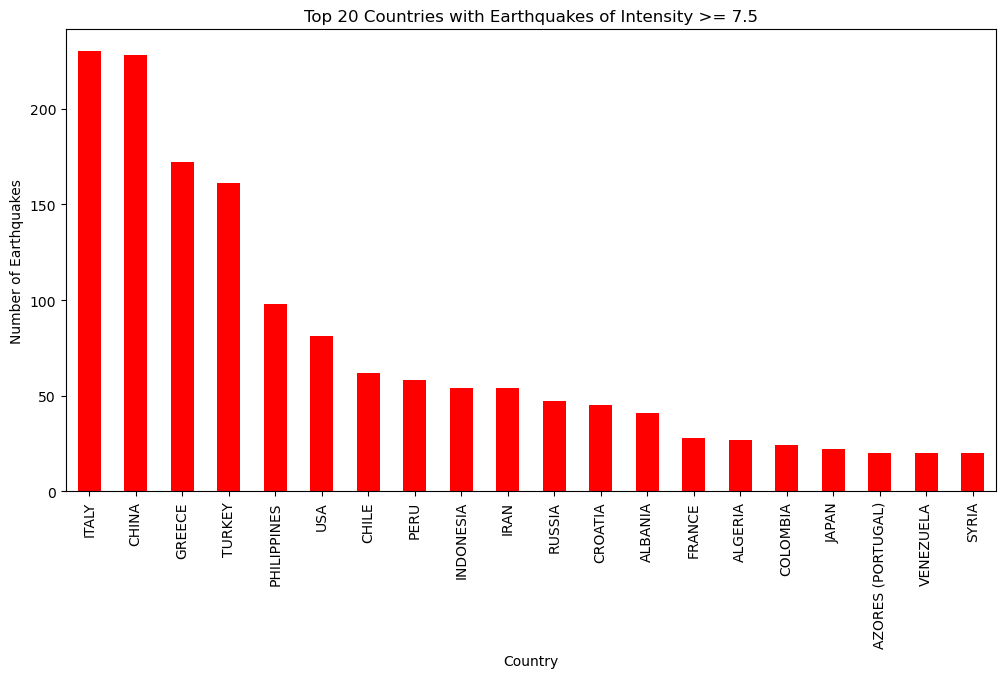

In [14]:
# Filter earthquakes with INTENSITY >= 7.5
high_intensity_earthquakes = worldwide_earthquake_df[worldwide_earthquake_df['INTENSITY'] >= 7.5]

# Count the number of earthquakes per country
earthquake_count_per_country = high_intensity_earthquakes['COUNTRY'].value_counts()

# Select the top 20 countries
top_countries = earthquake_count_per_country.head(20)

# Plotting the bar chart
top_countries.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 20 Countries with Earthquakes of Intensity >= 7.5')
plt.xlabel('Country')
plt.ylabel('Number of Earthquakes')
plt.savefig('Resources/high_intensity_earthquakes.png')
plt.show()

## visualising the distribution of earthquakes based on latitude and longitude/ interactive map using hvplot and geoviews

In [15]:
# Define a GeoDataFrame with the earthquakes and their coordinates
gdf = gpd.GeoDataFrame(worldwide_earthquake_df, geometry=gpd.points_from_xy(worldwide_earthquake_df['LONGITUDE'], worldwide_earthquake_df['LATITUDE']))

# Specify the hover information 
hover_cols = ['COUNTRY', 'FLAG_TSUNAMI', 'YEAR', 'FOCAL_DEPTH', 'EQ_PRIMARY','INTENSITY']

# Plot the map using hvplot and geoviews
map_plot = gdf.hvplot.points(
    geo=True,
    tiles='CartoLight',
    width=700,
    height=500,
    title='Earthquake Interactive Map',
    hover_cols=hover_cols)

# Saving the fig
plt.savefig('Resources/interacive_map')

# Show the plot
map_plot.opts(
    tools=['hover', 'pan', 'wheel_zoom'],
)

c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\shapely\measurement.py:106: RuntimeWarning: invalid value encountered in bounds
  return lib.bounds(geometry_arr, out=out, **kwargs)


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (COUNTRY,FLAG_TSUNAMI,YEAR,FOCAL_DEPTH,EQ_PRIMARY,INTENSITY)

<Figure size 640x480 with 0 Axes>

# Analysing patterns in earthquake occurrences related to specific geographical features

### 1. Create a heatmap based on earthquake intensity

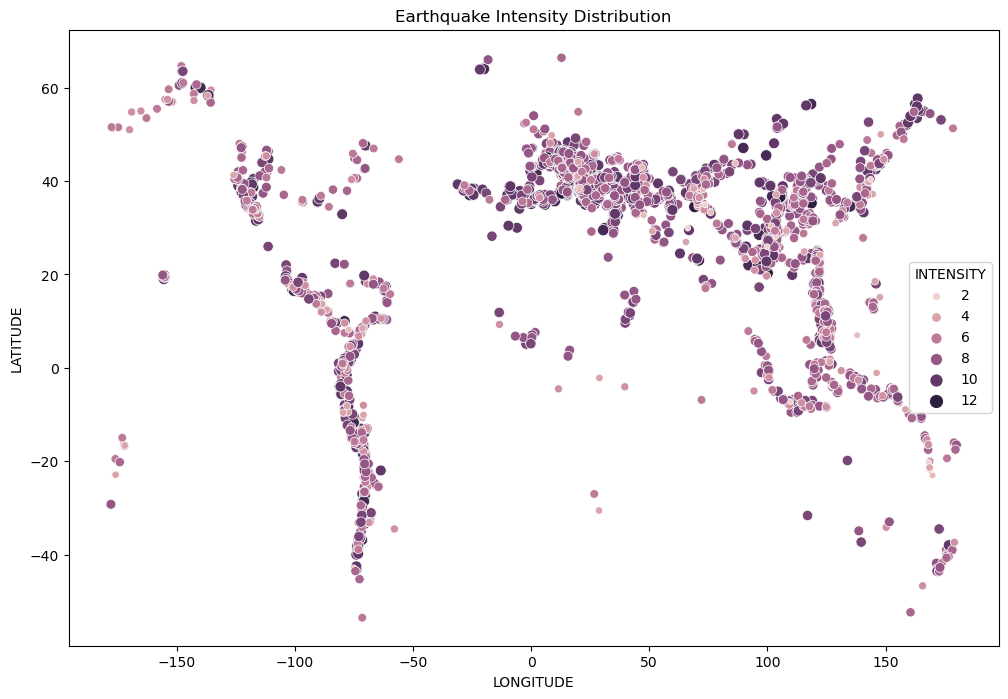

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='INTENSITY', size='INTENSITY', data=worldwide_earthquake_df)
plt.title('Earthquake Intensity Distribution')
plt.savefig('Resources/earthquake_intensity_heat_map')
plt.show()

# Create a scatterplot and Compute Linear Regression (EQ_PRIMARY, INTENSITY) 

The r-value is: 0.40010666756727725


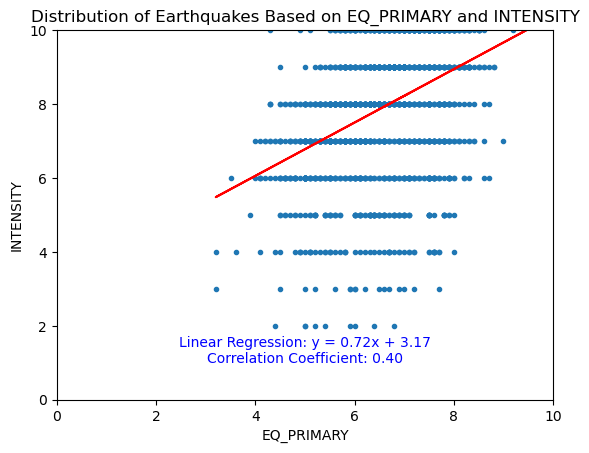

In [17]:
# Drop rows with null values in the specified columns
cleaned_data = worldwide_earthquake_df.dropna(subset=['EQ_PRIMARY', 'INTENSITY'])

# Scatter plot
plt.scatter(cleaned_data['EQ_PRIMARY'], cleaned_data['INTENSITY'], marker='.')

# Set plot labels and title
plt.xlabel('EQ_PRIMARY')
plt.ylabel('INTENSITY')
plt.title('Distribution of Earthquakes Based on EQ_PRIMARY and INTENSITY')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(cleaned_data['EQ_PRIMARY'], cleaned_data['INTENSITY'])

# Plot the linear regression line
plt.plot(cleaned_data['EQ_PRIMARY'], slope * cleaned_data['EQ_PRIMARY'] + intercept, color='red')

# Display linear regression equation and R-value
equation = f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}\nCorrelation Coefficient: {r_value:.2f}"
plt.annotate(equation, xy=(0.5, 0.1), xycoords='axes fraction', ha='center', fontsize=10, color='blue')

# Set axis bounds to 0 to 10
plt.xlim(0, 10)
plt.ylim(0, 10)
print(f"The r-value is: {r_value}")

# Save the fig
plt.savefig('Resources/eq_primary_intensity_correlation')

# Show the plot
plt.show()

An r-value of 0.40 suggests a positive moderate correlation between earthquake magnitude and intensity.

## 2. Time Series Analysis: Explore patterns over time by creating a time series plot of earthquake occurrences

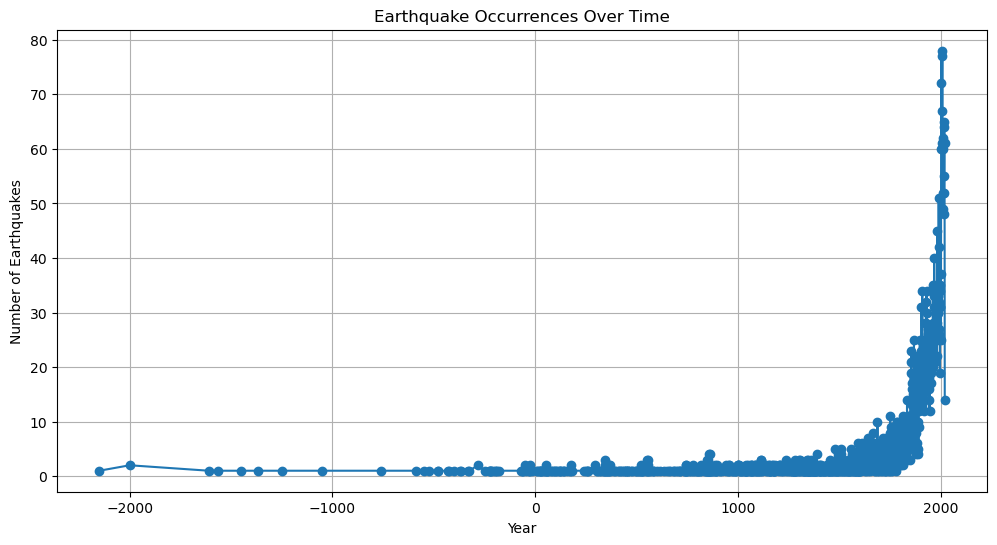

In [18]:
# Using the plot method to create a line plot of the counts of earthquakes for each unique year,
plt.figure(figsize=(12, 6))
worldwide_earthquake_df.groupby('YEAR').size().plot(marker='o')
plt.title('Earthquake Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.savefig('Resources/earthquake_occerance_overtime_lineplot_whole')
plt.show()

Let's zoom and check the year since 1900 onward

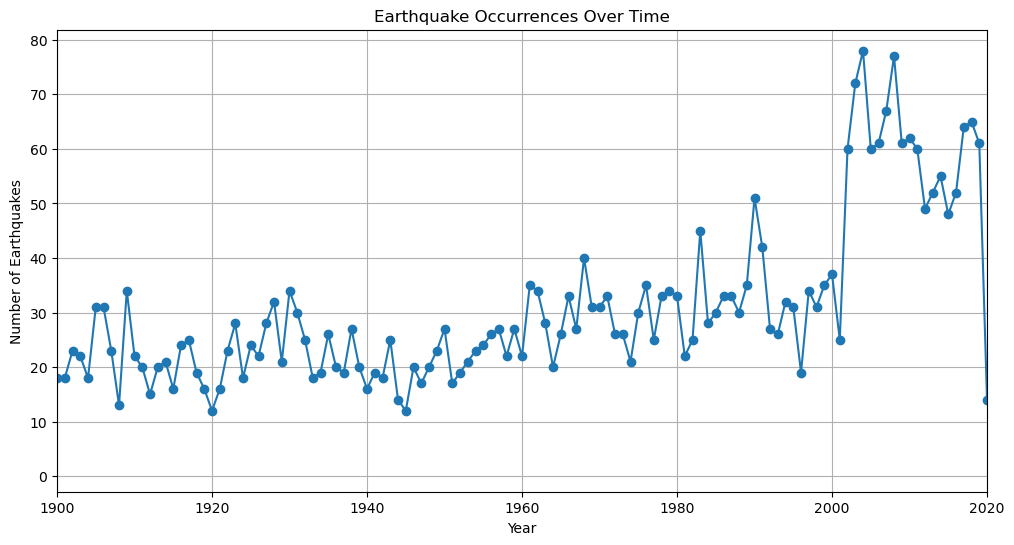

In [19]:
plt.figure(figsize=(12, 6))

# Set x-axis limits to start from the year 1900
plt.xlim(1900, max(worldwide_earthquake_df['YEAR']))
worldwide_earthquake_df.groupby('YEAR').size().plot(marker='o')
plt.title('Earthquake Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.savefig('Resources/earthquake_occerance_overtime_lineplot')
plt.show()

This line plot shows how earthquake counts have changed over time from 1900 to 2020. it has provided a clear representation of trends and fluctuations. An increasing trend is obvious here but to find a trend and check its accuracy using the statistical parameters, we will create a scatter plot and discuss the result based on our retrieved statistical values..

# Create a scatterplot and Compute Linear Regression 

Slope: 0.29491261346700987
Intercept: -547.2849207424467
R-squared: 0.4842162027070971
R-value: 0.6958564526589497
P-value: 8.106221125628514e-19
Standard Error: 0.027901917862735656


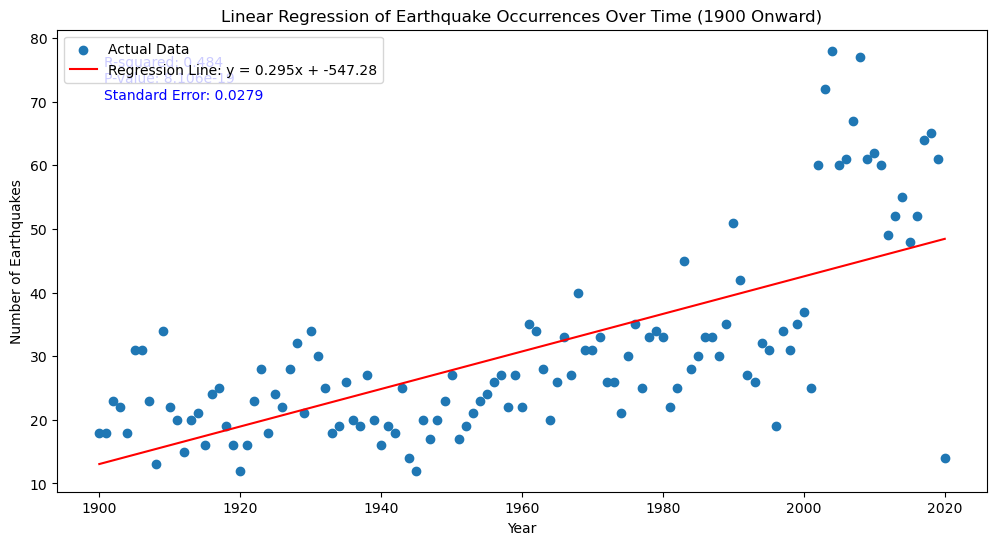

In [20]:
# Create a pandas Series that holds the counts of earthquakes for each year in our dataset 
grouped_data = worldwide_earthquake_df.groupby('YEAR').size()

# Filter data for years from 1900 onward
filtered_data = grouped_data[grouped_data.index >= 1900]

# Linear Regression(linregress function from the scipy.stats module to perform linear regression on our data) 
slope, intercept, r_value, p_value, std_err = linregress(filtered_data.index, filtered_data.values)

# Plot the regression line
plt.figure(figsize=(12, 6))
plt.scatter(filtered_data.index, filtered_data.values, marker='o', label='Actual Data')

# Plot the regression line and annotate the equation
reg_line = intercept + slope * filtered_data.index
plt.plot(filtered_data.index, reg_line, 'r', label=f'Regression Line: y = {slope:.3f}x + {intercept:.2f}')

plt.title('Linear Regression of Earthquake Occurrences Over Time (1900 Onward)')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.legend()
plt.annotate(f'R-squared: {r_value**2:.3f}\nP-value: {p_value:.3e}\nStandard Error: {std_err:.4f}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10, color='blue')

# Display regression statistics
print(f"Slope: {slope}\nIntercept: {intercept}\nR-squared: {r_value**2}\nR-value: {r_value}\nP-value: {p_value}\nStandard Error: {std_err}")

plt.savefig('Resources/linear_regression_overtime')

plt.show()

 Analysis: The linear regression results provide valuable information about the relationship between the year and the number of earthquakes. The positive slope(0.2968) suggests that, on average, the number of earthquakes has been increasing over the years. The low p-value (< 0.05) suggests that there is a statistically significant relationship between the year and the number of earthquakes. Our p-value here is (6.10e-19) that there is evidence of an increasing trend in the number of earthquakes over the years. (R-squared: 0.487) ) R-squared indicates the proportion of the variance in the number of earthquakes that is predictable from the year. In this case, approximately 48.7% of the variability in earthquake occurrences can be explained by the linear regression model. It means  the linear model does not explain the majority of the variability in earthquake occurrences, and other factors may contribute to seismic activity. The r-value is  0.6976, it shows a reletively strong relation between the number of earthquakes and the years. Overall, while the linear regression suggests a positive trend, it's essential to interpret the results in the context of the data. We need more geographycal knowledge about earthquake and considering other related factors that can affect the number of earthquaks per  year.

## Visalising the earthquake magnitudes over time to check the trends

C:\Users\Shiva\AppData\Local\Temp\ipykernel_18316\215747141.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YEAR', y='EQ_PRIMARY', data=magnitude_time_df, ci=None, color='orange')
c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


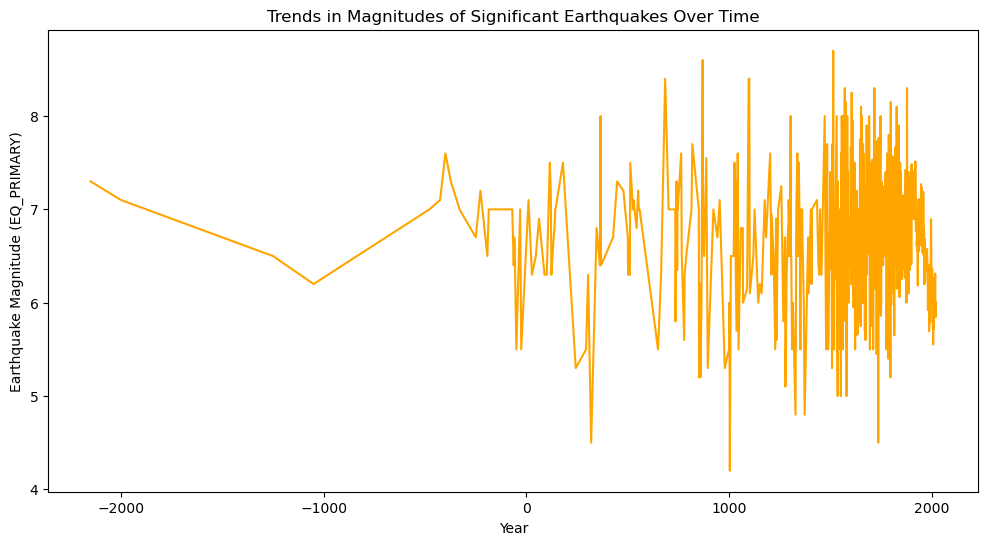

In [21]:
# Drop rows with NaN values in 'EQ_PRIMARY' and 'YEAR'
magnitude_time_df = worldwide_earthquake_df.dropna(subset=['EQ_PRIMARY', 'YEAR'])

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='EQ_PRIMARY', data=magnitude_time_df, ci=None, color='orange')
plt.xlabel('Year')
plt.ylabel('Earthquake Magnitude (EQ_PRIMARY)')
plt.title('Trends in Magnitudes of Significant Earthquakes Over Time')
plt.savefig('Resources/earthquake_magnitude_overtime')
plt.show()

## Visalising the earthquake magnitudes over time(1900 - latest) to check the trends

C:\Users\Shiva\AppData\Local\Temp\ipykernel_18316\1900718865.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='YEAR', y='EQ_PRIMARY', data=zoomed_df, ci=None, color='orange')
c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Shiva\anaconda3\envs\dev\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


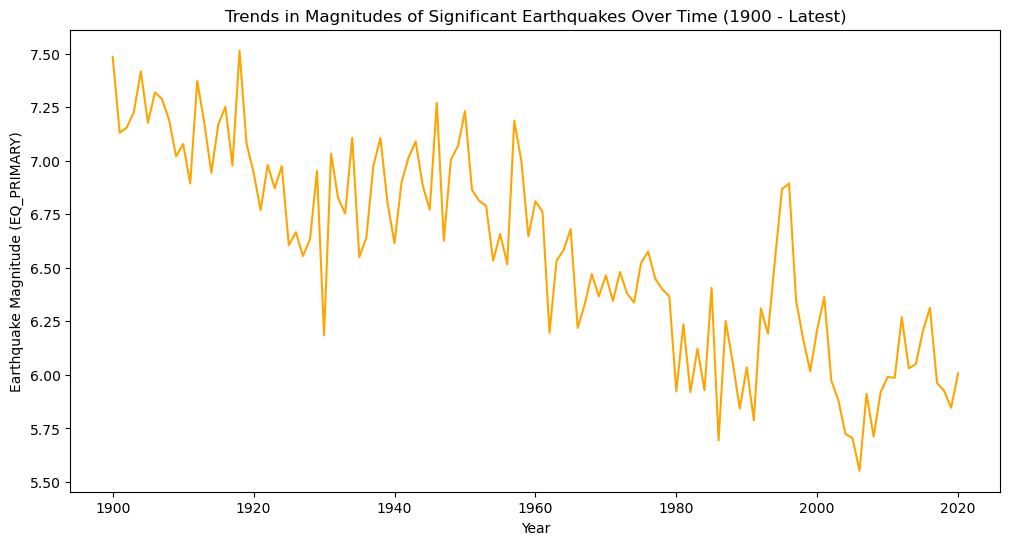

In [22]:
# Drop rows with NaN values in 'EQ_PRIMARY' and 'YEAR'
magnitude_time_df = worldwide_earthquake_df.dropna(subset=['EQ_PRIMARY', 'YEAR'])

# Set the time range for zooming in
start_year = 1900
end_year = magnitude_time_df['YEAR'].max()

# Filter the DataFrame for the specified time range
zoomed_df = magnitude_time_df[(magnitude_time_df['YEAR'] >= start_year) & (magnitude_time_df['YEAR'] <= end_year)]

# Create a line plot with zoomed-in time range
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='EQ_PRIMARY', data=zoomed_df, ci=None, color='orange')
plt.xlabel('Year')
plt.ylabel('Earthquake Magnitude (EQ_PRIMARY)')
plt.title('Trends in Magnitudes of Significant Earthquakes Over Time (1900 - Latest)')
plt.savefig('Resources/earthquake_magnitude_overtime_(1900 - Latest)')
plt.show()

The plot suggests a decreasing trend in earthquake magnitude over time. It also reflects periods of increases and decreases in earthquake magnitude over time as well.

## Heat map to compare the location of the earthquakes with Ring of Fire

In [23]:
# Drop rows with NaN values in 'LATITUDE' or 'LONGITUDE'
worldwide_earthquake_df_cleaned = worldwide_earthquake_df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a Folium map centered at the mean latitude and longitude
map_center = [worldwide_earthquake_df_cleaned['LATITUDE'].mean(), worldwide_earthquake_df_cleaned['LONGITUDE'].mean()]
my_map = folium.Map(location=map_center, zoom_start=2)

# Convert the earthquake data to a list of (latitude, longitude) pairs
locations = worldwide_earthquake_df_cleaned[['LATITUDE', 'LONGITUDE']].values.tolist()

# Add a heatmap layer to the map
HeatMap(locations).add_to(my_map)

# Save the fig
plt.savefig('Resources/earthquake_heat_map')

my_map

<Figure size 640x480 with 0 Axes>

# Earthquakes trigger tsunamies

## Visulising the earthquakes trigger tsunamis by pie chart

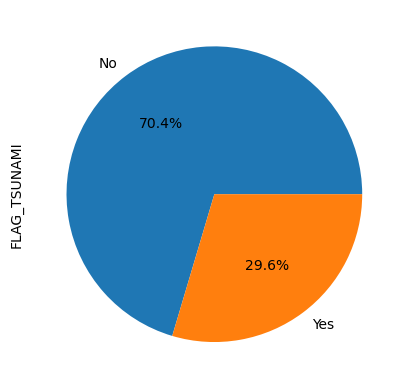

In [24]:
# Generate a pie plot showing the percentage of earthquakes trigger tsunamis as well
tsunami_df = worldwide_earthquake_df["FLAG_TSUNAMI"].value_counts()
tsunami_df.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("FLAG_TSUNAMI")
plt.savefig('Resources/tsunami_pie_chart')
plt.show()

## Visualising the earthquake localisation per tsunami triggered

In [25]:
allData = []
color = ['blue','orange']
for y in worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'].unique():
    data=go.Scattermapbox(lon = worldwide_earthquake_df_cleaned['LONGITUDE'][worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y],
                           lat=worldwide_earthquake_df_cleaned['LATITUDE'][worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y],
                       text = ['Year: ' + str(list(worldwide_earthquake_df_cleaned['YEAR'][worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y])[x]) for x in range(len(worldwide_earthquake_df_cleaned[worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y]))],
                       hoverinfo = 'text',
                       mode = 'markers',
                       name= 'No tsunami triggerd' if y == 'No' else 'Tsunami triggered',
                       marker=go.scattermapbox.Marker(size=[5]*len(worldwide_earthquake_df_cleaned['LATITUDE']),
                                                      sizeref = 1,
                                                      color= ['red']*len(worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y) if y == 'Yes' else ['grey']*len(worldwide_earthquake_df_cleaned['FLAG_TSUNAMI'] == y),
                                                      opacity=0.5))
    allData.append(data)
layout = go.Layout(autosize = True, showlegend=True,
                   title=dict(text="Earthquake localisation per tsunami triggered", font=dict(family="Verdana",size=25,color="Black")),
                   margin=go.layout.Margin(l=50,r=20,b=10,t=50,pad=4),
                   mapbox=go.layout.Mapbox(bearing = 0, # orientation
                                           pitch=0, # inclinaison
                                           zoom=0.6,
                                           style='basic'),
                   mapbox_style="stamen-terrain",
                   width=1050,height=550)
fig = go.Figure(data = allData,layout=layout)
plt.savefig('Resources/tsunami_world_map')
fig.show()

<Figure size 640x480 with 0 Axes>